In [ ]:
pip install fastai --upgrade 

In [2]:
from fastai.vision.all import *

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [ ]:
ls -1ha kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [ ]:
## !kaggle datasets download -d abdallahalidev/plantvillage-dataset
!kaggle datasets download -d ankursingh12/resized-plant2021

In [ ]:
! unzip /content/gdrive/MyDrive/Second_Dataset.zip

In [6]:
path = '/content/Datasets'

In [7]:
fns=get_image_files(path)
fns

(#18632) [Path('/content/Datasets/Rust/b897c367857a9330.jpg'),Path('/content/Datasets/Rust/e58655bd36640c5b.jpg'),Path('/content/Datasets/Rust/b889d5b403de8fb0.jpg'),Path('/content/Datasets/Rust/b6c8eb69e91b1862.jpg'),Path('/content/Datasets/Rust/f8b8bf45709b091c.jpg'),Path('/content/Datasets/Rust/a895956a4ab43ece.jpg'),Path('/content/Datasets/Rust/b8f08391de9f9099.jpg'),Path('/content/Datasets/Rust/f95c31e8bde0dc20.jpg'),Path('/content/Datasets/Rust/da45e0fa5bccbd00.jpg'),Path('/content/Datasets/Rust/a263f418785f09f6.jpg')...]

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex


In [ ]:
df_list = df.values.tolist()

In [ ]:
print(df_list)

In [ ]:
r, c = df.shape
print(r)

18632


In [ ]:
def get_x(x): return str(path) + os.path.sep + x['image']
def get_y(y): return y['labels']

In [8]:
leaf=DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=(0.2),seed=42),
               get_y=parent_label,item_tfms=Resize(512))

In [9]:
leaf = leaf.new(item_tfms=Resize(512), batch_tfms=aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=40.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0))

In [ ]:
dls=leaf.dataloaders(path,num_workers = 0)
#dls.train.show_batch(max_n=12, nrows = 2, unique = True)

In [ ]:
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

In [12]:
f1score = F1Score(average='macro')
learn = cnn_learner(dls, resnet50, metrics=[accuracy, f1score]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
lr_min,lr_steep = learner.lr_find(suggest_funcs=(minimum,steep))

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.20e-02, steepest point: 1.10e-02


In [ ]:
lr_steep

0.010964781977236271

In [ ]:
lr_min

0.012022644281387329

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.999493,0.631568,0.812668,0.448999,08:13


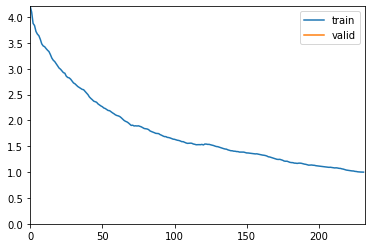

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.529897,0.392727,0.882716,0.507666,09:44
1,0.485779,0.386884,0.875738,0.508534,09:43
2,0.444918,0.368736,0.880569,0.504658,09:42
3,0.384465,0.358104,0.878690,0.565849,09:42
4,0.340780,0.310541,0.895867,0.588201,09:43
5,0.325240,0.293856,0.899893,0.563069,09:43
6,0.258852,0.284179,0.906334,0.607510,09:43
7,0.218110,0.258743,0.913580,0.671513,09:44
8,0.190992,0.255212,0.914117,0.656883,09:43


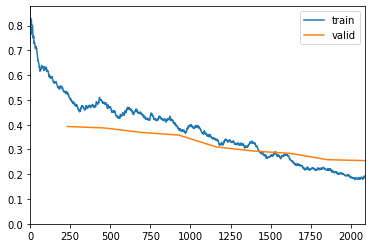

In [13]:
learn.fine_tune(9, 3e-3, wd=0.5,cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.346637,0.194460,0.947988,0.052012,06:57


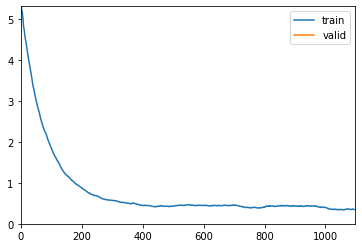

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.152187,0.093240,0.969669,0.030331,07:32
1,0.148058,0.180734,0.944802,0.055198,07:31
2,0.082855,0.077724,0.978774,0.021226,07:30
3,0.058179,0.045916,0.985831,0.014169,07:30
4,0.034827,0.030513,0.990042,0.009958,07:30
5,0.017535,0.010430,0.996415,0.003585,07:31
6,0.009422,0.004682,0.998634,0.001366,07:31
7,0.008094,0.004889,0.998350,0.001650,07:31


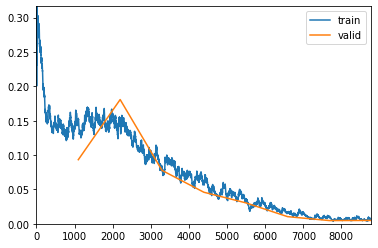

In [ ]:
#learner.fine_tune(8,base_lr=lr_steep,cbs=[ShowGraphCallback()])

In [14]:
from google.colab import files
learn.export('plantrowth_second_resnet50_train.pkl')
files.download('plantrowth_second_resnet50_train.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.upload()

In [ ]:
from PIL import Image
import os

img = Image.open('/content/aaaaa.jpg')

#os.remove('test.jpg')
img_resize = img.resize((512, 512))
img_resize.save('test.jpg')

In [ ]:
learn_test = load_learner('/content/no_2_dataset_train.pkl')
learn_test.predict("/content/test.jpg")

('powdery_mildew',
 tensor(4),
 tensor([1.0918e-01, 9.3482e-05, 1.2786e-03, 2.0634e-04, 6.8088e-01, 8.2936e-02,
         5.1326e-02, 3.7266e-03, 5.1190e-04, 5.3152e-02, 1.2595e-02, 4.1146e-03]))